In [1]:
# Import necessary libraries
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# Replace with your actual GCP Project ID
PROJECT_ID = "olist-group-2" 
DATASET_ID = "ecommerce_data" # Your BigQuery dataset containing the raw Olist tables

# --- BigQuery Client Initialization ---
# Ensure your GOOGLE_APPLICATION_CREDENTIALS environment variable is set.
# If not, you can specify the path here:
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/your/service_account_key.json"

client = bigquery.Client(project=PROJECT_ID)

print(f"Connected to BigQuery Project: {PROJECT_ID}")
print(f"Targeting Dataset: {DATASET_ID}")


/Users/IvanHan/Analyst_Module-2-Project-main/.venv/lib/python3.13/site-packages/google/auth/_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Connected to BigQuery Project: olist-group-2
Targeting Dataset: ecommerce_data


In [2]:
# ... (Cell 1 should be correctly configured with PROJECT_ID='olist-group-2' and DATASET_ID='ecommerce_data') ...

# Cell 2: Example - Load Olist Orders and Order Items into a DataFrame

# Construct a SQL query to join relevant raw tables
query = f"""
SELECT
    t1.order_id,
    t1.customer_id,
    t1.order_status,
    t1.order_purchase_timestamp,
    t1.order_approved_at,
    t1.order_delivered_carrier_date,
    t1.order_delivered_customer_date,
    t1.order_estimated_delivery_date,
    t2.order_item_id,
    t2.product_id,
    t2.seller_id,
    t2.price,
    t2.freight_value
FROM
    `{PROJECT_ID}.{DATASET_ID}.raw-orders` AS t1  -- <<< UPDATED TABLE NAME
JOIN
    `{PROJECT_ID}.{DATASET_ID}.raw-order_items` AS t2 ON t1.order_id = t2.order_id -- <<< UPDATED TABLE NAME
LIMIT 100000 
"""

# Execute the query and load results into a Pandas DataFrame
try:
    # Ensure this location matches your dataset's actual location in BigQuery
    df_sales = client.query(query, location='asia-southeast1').to_dataframe()
    print("Data loaded successfully!")
    print(f"DataFrame shape: {df_sales.shape}")
except Exception as e:
    print(f"Error loading data: {e}")

/Users/IvanHan/Analyst_Module-2-Project-main/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Data loaded successfully!
DataFrame shape: (100000, 13)


In [3]:
# Display the first few rows
print("First 5 rows of the DataFrame:")
display(df_sales.head())

# Get basic information about the DataFrame
print("\nDataFrame Info:")
df_sales.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
display(df_sales.describe())

First 5 rows of the DataFrame:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value
0,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17+00:00,2017-02-06 20:30:19+00:00,NaT,NaT,2017-03-01 00:00:00+00:00,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,19.85,10.96
1,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17+00:00,2017-02-06 20:30:19+00:00,NaT,NaT,2017-03-01 00:00:00+00:00,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,19.85,10.96
2,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34+00:00,2017-04-30 20:32:41+00:00,NaT,NaT,2017-05-22 00:00:00+00:00,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,169.90,9.56
3,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52+00:00,2016-10-06 15:50:56+00:00,NaT,NaT,2016-10-25 00:00:00+00:00,1,d2998d7ced12f83f9b832f33cf6507b6,25e6ffe976bd75618accfe16cefcbd0d,100.00,9.34
4,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34+00:00,2016-10-07 13:17:15+00:00,NaT,NaT,2016-10-28 00:00:00+00:00,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,59.50,15.56



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   order_id                       100000 non-null  object             
 1   customer_id                    100000 non-null  object             
 2   order_status                   100000 non-null  object             
 3   order_purchase_timestamp       100000 non-null  datetime64[us, UTC]
 4   order_approved_at              99985 non-null   datetime64[us, UTC]
 5   order_delivered_carrier_date   99529 non-null   datetime64[us, UTC]
 6   order_delivered_customer_date  99454 non-null   datetime64[us, UTC]
 7   order_estimated_delivery_date  100000 non-null  datetime64[us, UTC]
 8   order_item_id                  100000 non-null  Int64              
 9   product_id                     100000 non-null  object           

,order_item_id,price,freight_value
count,100000.0,100000.000000,100000.000000
mean,1.20133,119.733199,19.658901
std,0.717497,181.346887,15.264211
min,1.0,0.850000,0.000000
25%,1.0,39.900000,12.970000
50%,1.0,74.900000,16.110000
75%,1.0,132.900000,20.800000
max,21.0,6735.000000,409.680000


In [4]:
# Convert timestamp columns to datetime objects
datetime_cols = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in datetime_cols:
    df_sales[col] = pd.to_datetime(df_sales[col], errors='coerce')

# Calculate total sales amount per order item
df_sales['total_item_price'] = df_sales['price'] + df_sales['freight_value']

# Extract month for monthly analysis
df_sales['purchase_month'] = df_sales['order_purchase_timestamp'].dt.to_period('M')

print("Data preparation complete.")
display(df_sales.head())

Data preparation complete.


/var/folders/27/1_v5mg915_g0hvclb4vg3x1w0000gn/T/ipykernel_17173/2362991452.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sales['purchase_month'] = df_sales['order_purchase_timestamp'].dt.to_period('M')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value,total_item_price,purchase_month
0,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17+00:00,2017-02-06 20:30:19+00:00,NaT,NaT,2017-03-01 00:00:00+00:00,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,19.85,10.96,30.81,2017-02
1,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17+00:00,2017-02-06 20:30:19+00:00,NaT,NaT,2017-03-01 00:00:00+00:00,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,19.85,10.96,30.81,2017-02
2,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34+00:00,2017-04-30 20:32:41+00:00,NaT,NaT,2017-05-22 00:00:00+00:00,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,169.90,9.56,179.46,2017-04
3,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52+00:00,2016-10-06 15:50:56+00:00,NaT,NaT,2016-10-25 00:00:00+00:00,1,d2998d7ced12f83f9b832f33cf6507b6,25e6ffe976bd75618accfe16cefcbd0d,100.00,9.34,109.34,2016-10
4,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34+00:00,2016-10-07 13:17:15+00:00,NaT,NaT,2016-10-28 00:00:00+00:00,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,59.50,15.56,75.06,2016-09


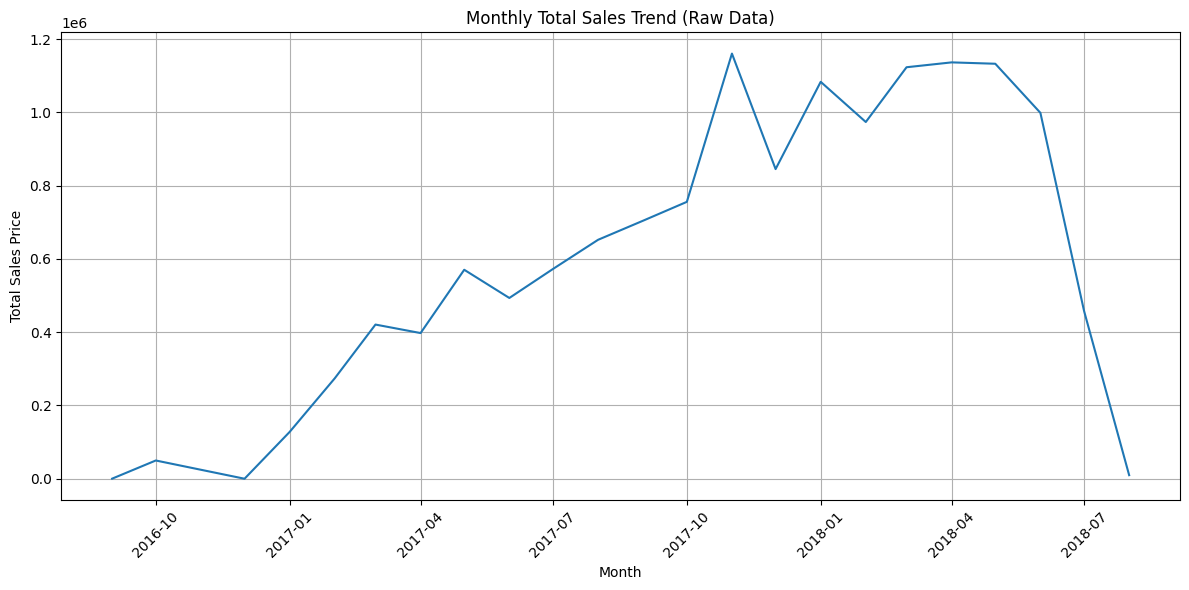

In [5]:
# Aggregate total sales by month
monthly_sales = df_sales.groupby('purchase_month')['total_item_price'].sum().reset_index()
monthly_sales['purchase_month'] = monthly_sales['purchase_month'].dt.to_timestamp() # Convert Period to Timestamp for plotting

plt.figure(figsize=(12, 6))
sns.lineplot(x='purchase_month', y='total_item_price', data=monthly_sales)
plt.title('Monthly Total Sales Trend (Raw Data)')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/27/1_v5mg915_g0hvclb4vg3x1w0000gn/T/ipykernel_17173/3344665758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_item_price', y='product_id', data=product_revenue, palette='viridis')


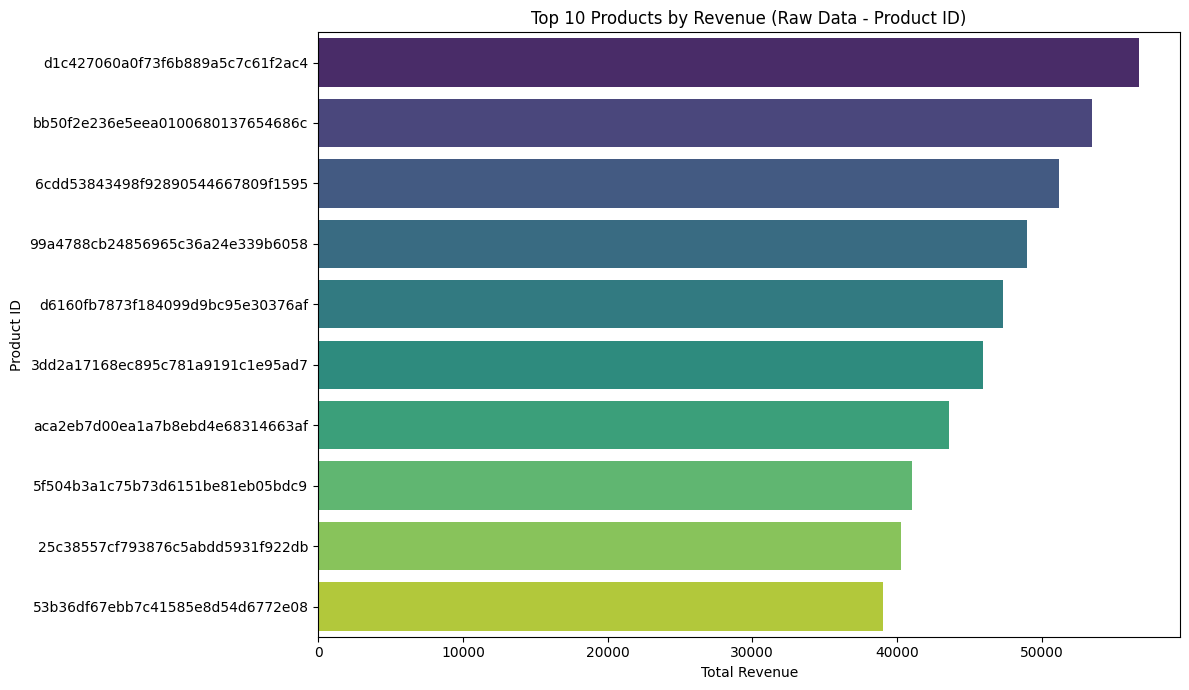

In [6]:
# Note: For accurate product names, you'd join with olist_products_dataset and product_category_name_translation.
# For now, let's use product_id directly.

# Aggregate sales by product_id
product_revenue = df_sales.groupby('product_id')['total_item_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='total_item_price', y='product_id', data=product_revenue, palette='viridis')
plt.title('Top 10 Products by Revenue (Raw Data - Product ID)')
plt.xlabel('Total Revenue')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()